In [1]:
import numpy as np
import math
import mode_analysis_code_original as ma
import random as rand #delete this

#num_ions=6
#mass_amu=9.012182
#vtrap=(0.0, -1750.0, -1970.0)
#v_wall=1.
#frot=180000
#method='bfgs'
#frot_kHz = 1e-3*frot 

num_ions=10
mass_amu=9.012182
vtrap=(0.0, -1750.0, -1970.0)
v_wall=30.
frot=180000
method='bfgs'
frot_kHz = 1e-3*frot 
ma_instance=ma.ModeAnalysis(
            N      = num_ions,
            ionmass= mass_amu,
            Vtrap  = vtrap,
            omega_z = 2*np.pi*1.58e6,
            Vwall  = v_wall,
            frot   = frot_kHz,
            method = method)
#print(dir(ma_instance))

ma_instance.run()
print(ma_instance.Cw)
pos = ma_instance.uE
print(pos)

omega_R = frot*2*np.pi

#start_pos_x = [0,0]
#start_pos_y = [0,0]
#start_pos_z = [1.165624087e-5,-1.165624087e-5]
#start_pos_z = [1e-4,-1e-4]
#vel_x = [0,0.0e00]
#vel_y = [0,0]
#vel_z = [1e01,1e01]
#vel_z = [0,0]
#q = [1.6e-19, 1.6e-19]
#m = [1.5e-26, 1.5e-26]

pert = np.empty(len(pos))
for i in range(len(pos)):
    pert[i] = np.random.normal(0, 10**-6)
start_pos_y = pos[:num_ions]+pert[:num_ions]
start_pos_x = pos[num_ions:]+pert[num_ions:]
#start_pos_x = pos[:num_ions]
#start_pos_y = pos[num_ions:]

'''
##initialize random positions in sphere#####
num_ions = 10
#rad = 2*10**-3 #ions uniformly distributed in sphere of this radius
rad = 2*10**-5 #test
vol = 4/3*np.pi*rad**3
start_pos_x = np.empty(num_ions)
start_pos_y = np.empty(num_ions)
start_pos_z = np.empty(num_ions)
for i in range(num_ions):
    this_vol = rand.random()*vol
    this_rad = (3/(4*np.pi)*this_vol)**(1/3)
    #this_theta = rand.random()*np.pi
    qq = rand.random()
    this_theta = np.arccos(2.*qq-1.)
    this_phi = rand.random()*2*np.pi
    start_pos_x[i] = this_rad * np.sin(this_theta) * np.cos(this_phi)
    start_pos_y[i] = this_rad * np.sin(this_theta) * np.sin(this_phi)
    start_pos_z[i] = this_rad * np.cos(this_theta)
omega_R = 1.602176597458587e-19*4.4588/(2*mass_amu*1.66057e-27) #w1
print(omega_R)
omega_z = 2*np.pi*1.58e6
q = 1.602176597458587e-19
Bz =4.4588
m = mass_amu*1.66057e-27
wc = q*Bz/m
omega_R = (wc-np.sqrt(wc**2-6*omega_z**2))/2 #w2
print(omega_R)
#omega_R = 180000*2*np.pi #w3
#omega_R = 180000*2*np.pi*20 #w4
print(omega_R)
#############################################
'''

##delete below this##
'''
start_pos_x = np.array([])
start_pos_y = np.array([])
for i in range(num_ions):
    this_area = rand.random()*np.pi*(20*10**-6)**2
    this_rad = (this_area/np.pi)**0.5
    this_ang = rand.random()*2*np.pi
    start_pos_x = np.append(start_pos_x, this_rad*np.cos(this_ang))
    start_pos_y = np.append(start_pos_y, this_rad*np.sin(this_ang))
print(start_pos_x)
'''
###delete above this###

#start_pos_x = [-1.52e-05, -7.33e-15,  2.14e-14,  1.52e-05]
#start_pos_y = [-2.80e-14, 1.73e-05, -1.73e-05,  2.41e-14]

#start_pos_x = [-2.52e-05, -1.33e-15,  4.14e-14,  -2.52e-05]
#start_pos_y = [6.80e-14, 7.73e-05, -3.73e-05,  6.41e-14]
'''
pert_z = np.empty(num_ions)
for i in range(num_ions):
    pert_z[i] = np.random.normal(0, 1*10**-6)
start_pos_z = pert_z'''

'''
pertz = np.empty(10)
for i in range(10):
    pertz[i] = np.random.normal(0, 10**-6)
start_pos_z = np.zeros(num_ions)+pertz
#start_pos_z = pert[:num_ions]
'''
vel_x= []
vel_y= []
vel_z = []
m = []
q=[]



###Initialize 1000 ions near equilibrium######
pert = np.empty(236*3)
#pert_vel = np.empty(236*3)
for i in range(236*3):
    pert[i] = np.random.normal(0, 0.1)
num_ions = 236
load_xrot = np.loadtxt("236i_ma_min_x.csv")
load_yrot = np.loadtxt("236i_ma_min_y.csv")
load_zrot = np.loadtxt("236i_ma_min_z.csv")
#start_pos_x = load_xrot[-1]
#start_pos_y = load_yrot[-1]
#start_pos_z = load_zrot[-1]
start_pos_x = load_xrot
start_pos_y = load_yrot
start_pos_z = load_zrot
#start_pos_x = load_xrot+pert[:num_ions]
#start_pos_y = load_yrot+pert[num_ions:2*num_ions]
#start_pos_z = load_zrot+pert[2*num_ions:3*num_ions]
#load_vxrot = np.loadtxt("vx" + sfx + ".csv")
#load_vyrot = np.loadtxt("vy" + sfx + ".csv")
#load_vzrot = np.loadtxt("vz" + sfx + ".csv")
#vel_x = np.loadtxt('vx_10i_eq.csv')
#vel_y = np.loadtxt('vy_10i_eq.csv')
#vel_z = np.loadtxt('vz_10i_eq.csv')
omega_z = 2*np.pi*1.58e6
q = 1.602176597458587e-19
Bz =4.4588
m = mass_amu*1.66057e-27
wc = q*Bz/m
omega_R = (wc-np.sqrt(wc**2-6*omega_z**2))/2 #w2
print(omega_R)
############################################

m = []
q=[]
for i in range(num_ions):
    vel_x.append(-omega_R*start_pos_y[i])
    #vel_x.append(0.0)
    vel_y.append(omega_R*start_pos_x[i])
    #vel_y.append(0.0)
    vel_z.append(0.0)
    #vel_z.append(0.0)
    q.append(1.602176597458587e-19)
    m.append(mass_amu*1.66057e-27)
    #m.append(9.012182*1.660539067e-27)
    
'''
#####TEST
vel_x = np.empty(num_ions)
vel_y = np.empty(num_ions)
vel_z = np.empty(num_ions)
for i in range(num_ions):
    this_vel = rand.random()*10
    qq = rand.random()
    this_theta = np.arccos(2.*qq-1.)
    this_phi = rand.random()*2*np.pi
    vel_x[i] = this_vel * np.sin(this_theta) * np.cos(this_phi)
    vel_y[i] = this_vel * np.sin(this_theta) * np.sin(this_phi)
    vel_z[i] = this_vel * np.cos(this_theta)
    
rx = np.sqrt((vel_x**2+vel_y**2+vel_z**2))
ry = vel_y
rz = vel_z
#fig, ax = plt.subplots(figsize =(10, 7))
#x = np.linspace(0,2*10**-5,100)
#ax.plot(x, x**2*700*10**10)
#ax.hist(rx,100)
#ax.hist(ry,100)
#ax.hist(rz,100)
#####TEST
'''
    
#vel_z = [3.0,4.0,-5.0,4.0]

#for i in range(100):
#    start_pos_x.append(i*10**-3)
#    start_pos_y.append(i*10**-3)
#    start_pos_z.append(i*10**-3)
#    vel_x.append(0)
#    vel_y.append(0)
#    vel_z.append(0)
#    q.append(1.6*10**-19)
#    m.append(1.5*10**-26)



dt = 1.0e-9
#duration = 4.04e-6*3
duration = 2.0e-6
steps = math.floor(duration/dt)
steps = 2.0e3
write_per = 1
Bz =4.4588
omega_z = 2*np.pi*1.58e6
kz = m[0]*omega_z**2 /q[0]
delta = ma_instance.Cw  
#delta = 0.0017511137595300618
#omega_R = 2*np.pi*44.0e3
phi0 = np.pi/2
#phi0 = 1333.1876642
#phi0= 334.47501329


##Cooling beams


'''
c = 3*10**8
wavelength_trans = 313*10**-9
gamma_0_trans = 2.0 * np.pi * 18e6 #transition linewidth for Be, rad/sec
#nu_trans = 2*np.pi*c/wavelength_trans #transition frequency, rad/sec
k = 2*np.pi/wavelength_trans
beam_S0 = [0.005,0.005,1] #peak intensity
beam_waist = [-1,-1,1*10**-6] #beam waists, -1 signifies uniform beam
beam_disp = [[0,0,0], [0,0,0], [0,1*10**-6,0]] #beam displacements from origin [[beam1],[beam2],[beam3]]
#beam_det = [-gamma_0_trans/2, -gamma_0_trans/2, (nu_trans-(gamma_0_trans/2))/(1-(2*np.pi*omega_R*beam_disp[2][2]/c))-nu_trans]
beam_det = [-gamma_0_trans/2, -gamma_0_trans/2, -gamma_0_trans/2+ k*omega_R*beam_disp[2][1]]
#k1 = (nu_trans+beam_det[0])/c
#k2 = (nu_trans+beam_det[1])/c
#k3 = (nu_trans+beam_det[2])/c
beam_k = [[0,0,k], [0,0,-k], [k,0,0]] #khat vectors of beams
num_beams = len(beam_waist)
'''
'''
c = 3*10**8
wavelength_trans = 313*10**-9
gamma_0_trans = 2.0 * np.pi * 18e6 #transition linewidth for Be, rad/sec
#nu_trans = 2*np.pi*c/wavelength_trans #transition frequency, rad/sec
k = 2*np.pi/wavelength_trans
beam_S0 = [0.005,0.005] #peak intensity
beam_waist = [-1,-1] #beam waists, -1 signifies uniform beam
beam_disp = [[0,0,0], [0,0,0]] #beam displacements from origin [[beam1],[beam2],[beam3]]
#beam_det = [-gamma_0_trans/2, -gamma_0_trans/2, (nu_trans-(gamma_0_trans/2))/(1-(2*np.pi*omega_R*beam_disp[2][2]/c))-nu_trans]
beam_det = [-gamma_0_trans/2, -gamma_0_trans/2]
#k1 = (nu_trans+beam_det[0])/c
#k2 = (nu_trans+beam_det[1])/c
#k3 = (nu_trans+beam_det[2])/c
beam_k = [[0,0,k], [0,0,-k]] #khat vectors of beams
num_beams = len(beam_waist)
'''
c = 3*10**8
wavelength_trans = 313*10**-9
gamma_0_trans = 2.0 * np.pi * 18e6 #transition linewidth for Be, rad/sec
#nu_trans = 2*np.pi*c/wavelength_trans #transition frequency, rad/sec
k = 2*np.pi/wavelength_trans
beam_S0 = [0.005] #peak intensity
beam_waist = [-1] #beam waists, -1 signifies uniform beam
beam_disp = [[0,0,0]] #beam displacements from origin [[beam1],[beam2],[beam3]]
#beam_det = [-gamma_0_trans/2, -gamma_0_trans/2, (nu_trans-(gamma_0_trans/2))/(1-(2*np.pi*omega_R*beam_disp[2][2]/c))-nu_trans]
beam_det = [-gamma_0_trans/2]
#k1 = (nu_trans+beam_det[0])/c
#k2 = (nu_trans+beam_det[1])/c
#k3 = (nu_trans+beam_det[2])/c
beam_k = [[0,0,k]] #khat vectors of beams
num_beams = len(beam_waist)
'''
beam_S0 = [] #peak intensity
beam_khat = [] #khat vectors of beams
beam_waist = [] #beam waists, -1 signifies uniform beam
beam_disp = [] #beam displacement from origin
c = 3*10**8

gamma_0_trans = 2.0 * np.pi * 18e6 #transition linewidth for Be
nu_trans = 124*10**9 #transition frequency
beam_det = []
num_beams = len(beam_waist)'''


f = open('input_236i_eq_evolve_031023.txt', 'w')

for i in range(len(start_pos_x)):
    if(i < len(start_pos_x)-1):
        f.write("{:e}".format(start_pos_x[i]) + " ")
    else:
        f.write("{:e}".format(start_pos_x[i]))
f.write("\n")

for i in range(len(start_pos_y)):
    if(i < len(start_pos_y)-1):
        f.write("{:e}".format(start_pos_y[i]) + " ")
    else:
        f.write("{:e}".format(start_pos_y[i]))
f.write("\n")

for i in range(len(start_pos_z)):
    if(i < len(start_pos_z)-1):
        f.write("{:e}".format(start_pos_z[i]) + " ")
    else:
        f.write("{:e}".format(start_pos_z[i]))
f.write("\n")

for i in range(len(vel_x)):
    if(i < len(vel_x)-1):
        f.write("{:e}".format(vel_x[i]) + " ")
    else:
        f.write("{:e}".format(vel_x[i]))
f.write("\n")

for i in range(len(vel_y)):
    if(i < len(vel_y)-1):
        f.write("{:e}".format(vel_y[i]) + " ")
    else:
        f.write("{:e}".format(vel_y[i]))
f.write("\n")

for i in range(len(vel_z)):
    if(i < len(vel_z)-1):
        f.write("{:e}".format(vel_z[i]) + " ")
    else:
        f.write("{:e}".format(vel_z[i]))
f.write("\n")

for i in range(len(q)):
    if(i < len(q)-1):
        f.write("{:.10e}".format(q[i]) + " ")
    else:
        f.write("{:.10e}".format(q[i]))
f.write("\n")

for i in range(len(m)):
    if(i < len(m)-1):
        f.write("{:.10e}".format(m[i]) + " ")
    else:
        f.write("{:.10e}".format(m[i]))
f.write("\n")

f.write("{:e}".format(dt) + "\n")

f.write("{:e}".format(duration) + "\n")

f.write("{:e}".format(steps) + "\n")

f.write("{:e}".format(write_per) + "\n")

f.write("{:.10e}".format(Bz) + "\n")

f.write("{:.10e}".format(kz) + "\n")

f.write("{:.10e}".format(delta) + "\n")

f.write("{:.10e}".format(omega_R) + "\n")

f.write("{:.10e}".format(phi0) + "\n")

f.write("{:e}".format(gamma_0_trans))
f.write("\n")

for i in range(num_beams):
    if(i < num_beams-1):
        f.write("{:.10e}".format(beam_S0[i]) + " ")
    else:
        f.write("{:.10e}".format(beam_S0[i]) + " ")
f.write("\n")

for i in range(3):
    for j in range(num_beams):
        if(j < num_beams-1):
            f.write("{:e}".format(beam_k[j][i]) + " ")
        else:
            f.write("{:e}".format(beam_k[j][i]))
    f.write("\n")

for i in range(num_beams):
    if(i < num_beams-1):
        f.write("{:e}".format(beam_waist[i]) + " ")
    else:
        f.write("{:e}".format(beam_waist[i]))
f.write("\n")
'''
for i in range(num_beams):
    if(i < num_beams-1):
        f.write("{:e}".format(beam_disp[i]) + " ")
    else:
        f.write("{:e}".format(beam_disp[i]))
f.write("\n")'''

for i in range(3):
    for j in range(num_beams):
        if(j < num_beams-1):
            f.write("{:e}".format(beam_disp[j][i]) + " ")
        else:
            f.write("{:e}".format(beam_disp[j][i]))
    f.write("\n")


for i in range(num_beams):
    if(i < num_beams-1):
        f.write("{:e}".format(beam_det[i]) + " ")
    else:
        f.write("{:e}".format(beam_det[i]))
f.write("\n")


#f.write(str(steps)+ "\n")

f.close()

'''
sfx = "100_test"
np.savetxt("x" + sfx + ".csv", start_pos_x[:], delimiter = ' ')
np.savetxt("y" + sfx + ".csv", start_pos_y[:], delimiter = ' ')
np.savetxt("z" + sfx + ".csv", start_pos_z[:], delimiter = ' ')
np.savetxt("vx" + sfx + ".csv", vel_x[:], delimiter = ' ')
np.savetxt("vy" + sfx + ".csv", vel_y[:], delimiter = ' ')
np.savetxt("vz" + sfx + ".csv", vel_z[:], delimiter = ' ')'''

False
Desired error not necessarily achieved due to precision loss.
False
Desired error not necessarily achieved due to precision loss.
False
Desired error not necessarily achieved due to precision loss.
False
Desired error not necessarily achieved due to precision loss.
False
Desired error not necessarily achieved due to precision loss.
False
Desired error not necessarily achieved due to precision loss.
False
Desired error not necessarily achieved due to precision loss.
False
Desired error not necessarily achieved due to precision loss.
False
Desired error not necessarily achieved due to precision loss.
False
Desired error not necessarily achieved due to precision loss.
False
Desired error not necessarily achieved due to precision loss.
False
Desired error not necessarily achieved due to precision loss.
False
Desired error not necessarily achieved due to precision loss.
False
Desired error not necessarily achieved due to precision loss.
False
Desired error not necessarily achieved due

'\nsfx = "100_test"\nnp.savetxt("x" + sfx + ".csv", start_pos_x[:], delimiter = \' \')\nnp.savetxt("y" + sfx + ".csv", start_pos_y[:], delimiter = \' \')\nnp.savetxt("z" + sfx + ".csv", start_pos_z[:], delimiter = \' \')\nnp.savetxt("vx" + sfx + ".csv", vel_x[:], delimiter = \' \')\nnp.savetxt("vy" + sfx + ".csv", vel_y[:], delimiter = \' \')\nnp.savetxt("vz" + sfx + ".csv", vel_z[:], delimiter = \' \')'

In [6]:
import numpy as np
import math
import mode_analysis_code_original as ma
import random as rand #delete this

#num_ions=6
#mass_amu=9.012182
#vtrap=(0.0, -1750.0, -1970.0)
#v_wall=1.
#frot=180000
#method='bfgs'
#frot_kHz = 1e-3*frot 

num_ions=1000
mass_amu=9.012182
vtrap=(0.0, -1750.0, -1970.0)
v_wall=30.
frot=180000
method='bfgs'
frot_kHz = 1e-3*frot 
ma_instance=ma.ModeAnalysis(
            N      = num_ions,
            ionmass= mass_amu,
            Vtrap  = vtrap,
            omega_z = 2*np.pi*1.58e6,
            Vwall  = v_wall,
            frot   = frot_kHz,
            method = method)
#print(dir(ma_instance))

ma_instance.run()
print(ma_instance.Cw)
pos = ma_instance.uE
print(pos)

omega_R = frot*2*np.pi

#start_pos_x = [0,0]
#start_pos_y = [0,0]
#start_pos_z = [1.165624087e-5,-1.165624087e-5]
#start_pos_z = [1e-4,-1e-4]
#vel_x = [0,0.0e00]
#vel_y = [0,0]
#vel_z = [1e01,1e01]
#vel_z = [0,0]
#q = [1.6e-19, 1.6e-19]
#m = [1.5e-26, 1.5e-26]

pert = np.empty(len(pos))
for i in range(len(pos)):
    pert[i] = np.random.normal(0, 10**-6)
#start_pos_y = pos[:num_ions]+pert[:num_ions]
#start_pos_x = pos[num_ions:]+pert[num_ions:]
start_pos_x = pos[:num_ions]
start_pos_y = pos[num_ions:]
start_pos_z = np.zeros(num_ions)

##delete below this##
'''
start_pos_x = np.array([])
start_pos_y = np.array([])
for i in range(num_ions):
    this_area = rand.random()*np.pi*(20*10**-6)**2
    this_rad = (this_area/np.pi)**0.5
    this_ang = rand.random()*2*np.pi
    start_pos_x = np.append(start_pos_x, this_rad*np.cos(this_ang))
    start_pos_y = np.append(start_pos_y, this_rad*np.sin(this_ang))
print(start_pos_x)
'''
###delete above this###

#start_pos_x = [-1.52e-05, -7.33e-15,  2.14e-14,  1.52e-05]
#start_pos_y = [-2.80e-14, 1.73e-05, -1.73e-05,  2.41e-14]

#start_pos_x = [-2.52e-05, -1.33e-15,  4.14e-14,  -2.52e-05]
#start_pos_y = [6.80e-14, 7.73e-05, -3.73e-05,  6.41e-14]
'''
pert_z = np.empty(num_ions)
for i in range(num_ions):
    pert_z[i] = np.random.normal(0, 1*10**-6)
start_pos_z = pert_z'''

'''
pertz = np.empty(10)
for i in range(10):
    pertz[i] = np.random.normal(0, 10**-6)
start_pos_z = np.zeros(num_ions)+pertz
#start_pos_z = pert[:num_ions]
'''
vel_x= []
vel_y= []
vel_z = []
m = []
q=[]



omega_z = 2*np.pi*1.58e6
q = 1.602176597458587e-19
Bz =4.4588
m = mass_amu*1.66057e-27
wc = q*Bz/m


m = []
q=[]
for i in range(num_ions):
    vel_x.append(-omega_R*start_pos_y[i])
    #vel_x.append(0.0)
    vel_y.append(omega_R*start_pos_x[i])
    #vel_y.append(0.0)
    vel_z.append(0.0)
    #vel_z.append(0.0)
    q.append(1.602176597458587e-19)
    m.append(mass_amu*1.66057e-27)
    #m.append(9.012182*1.660539067e-27)
    

    
#vel_z = [3.0,4.0,-5.0,4.0]

#for i in range(100):
#    start_pos_x.append(i*10**-3)
#    start_pos_y.append(i*10**-3)
#    start_pos_z.append(i*10**-3)
#    vel_x.append(0)
#    vel_y.append(0)
#    vel_z.append(0)
#    q.append(1.6*10**-19)
#    m.append(1.5*10**-26)



dt = 1.0e-9
#duration = 4.04e-6*3
duration = 5.0e-5
steps = math.floor(duration/dt)
steps = 5.0e4
write_per = 1
Bz =4.4588
omega_z = 2*np.pi*1.58e6
kz = m[0]*omega_z**2 /q[0]
delta = ma_instance.Cw  
#delta = 0.0017511137595300618
#omega_R = 2*np.pi*44.0e3
phi0 = np.pi/2
#phi0 = 1333.1876642
#phi0= 334.47501329


##Cooling beams


'''
c = 3*10**8
wavelength_trans = 313*10**-9
gamma_0_trans = 2.0 * np.pi * 18e6 #transition linewidth for Be, rad/sec
#nu_trans = 2*np.pi*c/wavelength_trans #transition frequency, rad/sec
k = 2*np.pi/wavelength_trans
beam_S0 = [0.005,0.005,1] #peak intensity
beam_waist = [-1,-1,1*10**-6] #beam waists, -1 signifies uniform beam
beam_disp = [[0,0,0], [0,0,0], [0,1*10**-6,0]] #beam displacements from origin [[beam1],[beam2],[beam3]]
#beam_det = [-gamma_0_trans/2, -gamma_0_trans/2, (nu_trans-(gamma_0_trans/2))/(1-(2*np.pi*omega_R*beam_disp[2][2]/c))-nu_trans]
beam_det = [-gamma_0_trans/2, -gamma_0_trans/2, -gamma_0_trans/2+ k*omega_R*beam_disp[2][1]]
#k1 = (nu_trans+beam_det[0])/c
#k2 = (nu_trans+beam_det[1])/c
#k3 = (nu_trans+beam_det[2])/c
beam_k = [[0,0,k], [0,0,-k], [k,0,0]] #khat vectors of beams
num_beams = len(beam_waist)
'''
'''
c = 3*10**8
wavelength_trans = 313*10**-9
gamma_0_trans = 2.0 * np.pi * 18e6 #transition linewidth for Be, rad/sec
#nu_trans = 2*np.pi*c/wavelength_trans #transition frequency, rad/sec
k = 2*np.pi/wavelength_trans
beam_S0 = [0.005,0.005] #peak intensity
beam_waist = [-1,-1] #beam waists, -1 signifies uniform beam
beam_disp = [[0,0,0], [0,0,0]] #beam displacements from origin [[beam1],[beam2],[beam3]]
#beam_det = [-gamma_0_trans/2, -gamma_0_trans/2, (nu_trans-(gamma_0_trans/2))/(1-(2*np.pi*omega_R*beam_disp[2][2]/c))-nu_trans]
beam_det = [-gamma_0_trans/2, -gamma_0_trans/2]
#k1 = (nu_trans+beam_det[0])/c
#k2 = (nu_trans+beam_det[1])/c
#k3 = (nu_trans+beam_det[2])/c
beam_k = [[0,0,k], [0,0,-k]] #khat vectors of beams
num_beams = len(beam_waist)
'''
c = 3*10**8
wavelength_trans = 313*10**-9
gamma_0_trans = 2.0 * np.pi * 18e6 #transition linewidth for Be, rad/sec
#nu_trans = 2*np.pi*c/wavelength_trans #transition frequency, rad/sec
k = 2*np.pi/wavelength_trans
beam_S0 = [0.005] #peak intensity
beam_waist = [-1] #beam waists, -1 signifies uniform beam
beam_disp = [[0,0,0]] #beam displacements from origin [[beam1],[beam2],[beam3]]
#beam_det = [-gamma_0_trans/2, -gamma_0_trans/2, (nu_trans-(gamma_0_trans/2))/(1-(2*np.pi*omega_R*beam_disp[2][2]/c))-nu_trans]
beam_det = [-gamma_0_trans/2]
#k1 = (nu_trans+beam_det[0])/c
#k2 = (nu_trans+beam_det[1])/c
#k3 = (nu_trans+beam_det[2])/c
beam_k = [[0,0,k]] #khat vectors of beams
num_beams = len(beam_waist)
'''
beam_S0 = [] #peak intensity
beam_khat = [] #khat vectors of beams
beam_waist = [] #beam waists, -1 signifies uniform beam
beam_disp = [] #beam displacement from origin
c = 3*10**8

gamma_0_trans = 2.0 * np.pi * 18e6 #transition linewidth for Be
nu_trans = 124*10**9 #transition frequency
beam_det = []
num_beams = len(beam_waist)'''


f = open('input_236i_eq_evolve_writeeach.txt', 'w')

for i in range(len(start_pos_x)):
    if(i < len(start_pos_x)-1):
        f.write("{:e}".format(start_pos_x[i]) + " ")
    else:
        f.write("{:e}".format(start_pos_x[i]))
f.write("\n")

for i in range(len(start_pos_y)):
    if(i < len(start_pos_y)-1):
        f.write("{:e}".format(start_pos_y[i]) + " ")
    else:
        f.write("{:e}".format(start_pos_y[i]))
f.write("\n")

for i in range(len(start_pos_z)):
    if(i < len(start_pos_z)-1):
        f.write("{:e}".format(start_pos_z[i]) + " ")
    else:
        f.write("{:e}".format(start_pos_z[i]))
f.write("\n")

for i in range(len(vel_x)):
    if(i < len(vel_x)-1):
        f.write("{:e}".format(vel_x[i]) + " ")
    else:
        f.write("{:e}".format(vel_x[i]))
f.write("\n")

for i in range(len(vel_y)):
    if(i < len(vel_y)-1):
        f.write("{:e}".format(vel_y[i]) + " ")
    else:
        f.write("{:e}".format(vel_y[i]))
f.write("\n")

for i in range(len(vel_z)):
    if(i < len(vel_z)-1):
        f.write("{:e}".format(vel_z[i]) + " ")
    else:
        f.write("{:e}".format(vel_z[i]))
f.write("\n")

for i in range(len(q)):
    if(i < len(q)-1):
        f.write("{:.10e}".format(q[i]) + " ")
    else:
        f.write("{:.10e}".format(q[i]))
f.write("\n")

for i in range(len(m)):
    if(i < len(m)-1):
        f.write("{:.10e}".format(m[i]) + " ")
    else:
        f.write("{:.10e}".format(m[i]))
f.write("\n")

f.write("{:e}".format(dt) + "\n")

f.write("{:e}".format(duration) + "\n")

f.write("{:e}".format(steps) + "\n")

f.write("{:e}".format(write_per) + "\n")

f.write("{:.10e}".format(Bz) + "\n")

f.write("{:.10e}".format(kz) + "\n")

f.write("{:.10e}".format(delta) + "\n")

f.write("{:.10e}".format(omega_R) + "\n")

f.write("{:.10e}".format(phi0) + "\n")

f.write("{:e}".format(gamma_0_trans))
f.write("\n")

for i in range(num_beams):
    if(i < num_beams-1):
        f.write("{:.10e}".format(beam_S0[i]) + " ")
    else:
        f.write("{:.10e}".format(beam_S0[i]) + " ")
f.write("\n")

for i in range(3):
    for j in range(num_beams):
        if(j < num_beams-1):
            f.write("{:e}".format(beam_k[j][i]) + " ")
        else:
            f.write("{:e}".format(beam_k[j][i]))
    f.write("\n")

for i in range(num_beams):
    if(i < num_beams-1):
        f.write("{:e}".format(beam_waist[i]) + " ")
    else:
        f.write("{:e}".format(beam_waist[i]))
f.write("\n")
'''
for i in range(num_beams):
    if(i < num_beams-1):
        f.write("{:e}".format(beam_disp[i]) + " ")
    else:
        f.write("{:e}".format(beam_disp[i]))
f.write("\n")'''

for i in range(3):
    for j in range(num_beams):
        if(j < num_beams-1):
            f.write("{:e}".format(beam_disp[j][i]) + " ")
        else:
            f.write("{:e}".format(beam_disp[j][i]))
    f.write("\n")


for i in range(num_beams):
    if(i < num_beams-1):
        f.write("{:e}".format(beam_det[i]) + " ")
    else:
        f.write("{:e}".format(beam_det[i]))
f.write("\n")


#f.write(str(steps)+ "\n")

f.close()

'''
sfx = "100_test"
np.savetxt("x" + sfx + ".csv", start_pos_x[:], delimiter = ' ')
np.savetxt("y" + sfx + ".csv", start_pos_y[:], delimiter = ' ')
np.savetxt("z" + sfx + ".csv", start_pos_z[:], delimiter = ' ')
np.savetxt("vx" + sfx + ".csv", vel_x[:], delimiter = ' ')
np.savetxt("vy" + sfx + ".csv", vel_y[:], delimiter = ' ')
np.savetxt("vz" + sfx + ".csv", vel_z[:], delimiter = ' ')'''

False
Desired error not necessarily achieved due to precision loss.
False
Desired error not necessarily achieved due to precision loss.
False
Desired error not necessarily achieved due to precision loss.
False
Desired error not necessarily achieved due to precision loss.
False
Desired error not necessarily achieved due to precision loss.
False
Desired error not necessarily achieved due to precision loss.
(472,)
0.010506682557180371
[ 2.36436143e-08  2.94998830e-07  1.23466960e-05 -2.60491789e-07
 -1.27969072e-05 -1.25218000e-05 -1.21849020e-05  1.28365678e-06
  1.25143945e-05  1.25292944e-05  2.50339487e-05  1.19620019e-05
  1.11592038e-05 -7.07237826e-07 -1.30502625e-05 -2.51357170e-05
 -2.42967447e-05 -1.16195622e-05 -1.06507558e-05 -1.01672863e-05
  1.33284601e-05  2.43173831e-05  2.46927563e-05  2.50103786e-05
  2.48061853e-05  3.42860650e-05  2.31112360e-05  1.00671237e-05
 -1.44866127e-06 -1.30906960e-05 -2.48544282e-05 -3.74956912e-05
 -2.48460921e-05 -2.33006618e-05 -3.64559383

'\nsfx = "100_test"\nnp.savetxt("x" + sfx + ".csv", start_pos_x[:], delimiter = \' \')\nnp.savetxt("y" + sfx + ".csv", start_pos_y[:], delimiter = \' \')\nnp.savetxt("z" + sfx + ".csv", start_pos_z[:], delimiter = \' \')\nnp.savetxt("vx" + sfx + ".csv", vel_x[:], delimiter = \' \')\nnp.savetxt("vy" + sfx + ".csv", vel_y[:], delimiter = \' \')\nnp.savetxt("vz" + sfx + ".csv", vel_z[:], delimiter = \' \')'

In [15]:
import numpy as np
import math
import mode_analysis_code_original as ma
import random as rand #delete this

#num_ions=6
#mass_amu=9.012182
#vtrap=(0.0, -1750.0, -1970.0)
#v_wall=1.
#frot=180000
#method='bfgs'
#frot_kHz = 1e-3*frot 

num_ions=10
mass_amu=9.012182
vtrap=(0.0, -1750.0, -1970.0)
v_wall=5.
frot=180000
method='bfgs'
frot_kHz = 1e-3*frot 
ma_instance=ma.ModeAnalysis(
            N      = num_ions,
            ionmass= mass_amu,
            Vtrap  = vtrap,
            omega_z = 2*np.pi*1.58e6,
            Vwall  = v_wall,
            frot   = frot_kHz,
            method = method)
#print(dir(ma_instance))

ma_instance.run()
print(ma_instance.Cw)
omega_R = frot*2*np.pi



##initialize random positions in sphere#####
num_ions = 100
#rad = 2*10**-3 #ions uniformly distributed in sphere of this radius
rad = 2*10**-5 #test
vol = 4/3*np.pi*rad**3
start_pos_x = np.empty(num_ions)
start_pos_y = np.empty(num_ions)
start_pos_z = np.empty(num_ions)
for i in range(num_ions):
    this_vol = rand.random()*vol
    this_rad = (3/(4*np.pi)*this_vol)**(1/3)
    #this_theta = rand.random()*np.pi
    qq = rand.random()
    this_theta = np.arccos(2.*qq-1.)
    this_phi = rand.random()*2*np.pi
    start_pos_x[i] = this_rad * np.sin(this_theta) * np.cos(this_phi)
    start_pos_y[i] = this_rad * np.sin(this_theta) * np.sin(this_phi)
    start_pos_z[i] = this_rad * np.cos(this_theta)
#omega_R = 1.602176597458587e-19*4.4588/(2*mass_amu*1.66057e-27)
omega_z = 2*np.pi*1.58e6
q = 1.602176597458587e-19
Bz =4.4588
m = mass_amu*1.66057e-27
wc = q*Bz/m
omega_R = (wc-np.sqrt(wc**2-6*omega_z**2))/2
print(omega_R/(2*np.pi))
#omega_R = 180000*2*np.pi
#############################################

vel_x= []
vel_y= []
vel_z = []
m = []
q=[]

for i in range(num_ions):
    #vel_x.append(-omega_R*start_pos_y[i])
    vel_x.append(0.0)
    #vel_y.append(omega_R*start_pos_x[i])
    vel_y.append(0.0)
    vel_z.append(0.0)
    #vel_z.append(0)
    q.append(1.602176597458587e-19)
    m.append(mass_amu*1.66057e-27)
    #m.append(9.012182*1.660539067e-27)
    

    
dt = 1.0e-9
duration = 2.0e-5
steps = math.floor(duration/dt)
write_per = 2
Bz =4.4588
omega_z = 2*np.pi*1.58e6
kz = m[0]*omega_z**2 /q[0]
delta = ma_instance.Cw  
phi0 = np.pi/2

print(m[0])
print(Bz)
print(q[0])
print(q[0]*Bz/m[0])

##Cooling beams


'''
c = 3*10**8
wavelength_trans = 313*10**-9
gamma_0_trans = 2.0 * np.pi * 18e6 #transition linewidth for Be, rad/sec
#nu_trans = 2*np.pi*c/wavelength_trans #transition frequency, rad/sec
k = 2*np.pi/wavelength_trans
beam_S0 = [0.005,0.005,1] #peak intensity
beam_waist = [-1,-1,1*10**-6] #beam waists, -1 signifies uniform beam
beam_disp = [[0,0,0], [0,0,0], [0,1*10**-6,0]] #beam displacements from origin [[beam1],[beam2],[beam3]]
#beam_det = [-gamma_0_trans/2, -gamma_0_trans/2, (nu_trans-(gamma_0_trans/2))/(1-(2*np.pi*omega_R*beam_disp[2][2]/c))-nu_trans]
beam_det = [-gamma_0_trans/2, -gamma_0_trans/2, -gamma_0_trans/2+ k*omega_R*beam_disp[2][1]]
#k1 = (nu_trans+beam_det[0])/c
#k2 = (nu_trans+beam_det[1])/c
#k3 = (nu_trans+beam_det[2])/c
beam_k = [[0,0,k], [0,0,-k], [k,0,0]] #khat vectors of beams
num_beams = len(beam_waist)
'''
'''
c = 3*10**8
wavelength_trans = 313*10**-9
gamma_0_trans = 2.0 * np.pi * 18e6 #transition linewidth for Be, rad/sec
#nu_trans = 2*np.pi*c/wavelength_trans #transition frequency, rad/sec
k = 2*np.pi/wavelength_trans
beam_S0 = [0.005,0.005] #peak intensity
beam_waist = [-1,-1] #beam waists, -1 signifies uniform beam
beam_disp = [[0,0,0], [0,0,0]] #beam displacements from origin [[beam1],[beam2],[beam3]]
#beam_det = [-gamma_0_trans/2, -gamma_0_trans/2, (nu_trans-(gamma_0_trans/2))/(1-(2*np.pi*omega_R*beam_disp[2][2]/c))-nu_trans]
beam_det = [-gamma_0_trans/2, -gamma_0_trans/2]
#k1 = (nu_trans+beam_det[0])/c
#k2 = (nu_trans+beam_det[1])/c
#k3 = (nu_trans+beam_det[2])/c
beam_k = [[0,0,k], [0,0,-k]] #khat vectors of beams
num_beams = len(beam_waist)
'''
c = 3*10**8
wavelength_trans = 313*10**-9
gamma_0_trans = 2.0 * np.pi * 18e6 #transition linewidth for Be, rad/sec
#nu_trans = 2*np.pi*c/wavelength_trans #transition frequency, rad/sec
k = 2*np.pi/wavelength_trans
beam_S0 = [0.005] #peak intensity
beam_waist = [-1] #beam waists, -1 signifies uniform beam
beam_disp = [[0,0,0]] #beam displacements from origin [[beam1],[beam2],[beam3]]
#beam_det = [-gamma_0_trans/2, -gamma_0_trans/2, (nu_trans-(gamma_0_trans/2))/(1-(2*np.pi*omega_R*beam_disp[2][2]/c))-nu_trans]
beam_det = [-gamma_0_trans/2]
#k1 = (nu_trans+beam_det[0])/c
#k2 = (nu_trans+beam_det[1])/c
#k3 = (nu_trans+beam_det[2])/c
beam_k = [[0,0,k]] #khat vectors of beams
num_beams = len(beam_waist)
'''
beam_S0 = [] #peak intensity
beam_khat = [] #khat vectors of beams
beam_waist = [] #beam waists, -1 signifies uniform beam
beam_disp = [] #beam displacement from origin
c = 3*10**8

gamma_0_trans = 2.0 * np.pi * 18e6 #transition linewidth for Be
nu_trans = 124*10**9 #transition frequency
beam_det = []
num_beams = len(beam_waist)'''


f = open('input_test_ignore.txt', 'w')

for i in range(len(start_pos_x)):
    if(i < len(start_pos_x)-1):
        f.write("{:e}".format(start_pos_x[i]) + " ")
    else:
        f.write("{:e}".format(start_pos_x[i]))
f.write("\n")

for i in range(len(start_pos_y)):
    if(i < len(start_pos_y)-1):
        f.write("{:e}".format(start_pos_y[i]) + " ")
    else:
        f.write("{:e}".format(start_pos_y[i]))
f.write("\n")

for i in range(len(start_pos_z)):
    if(i < len(start_pos_z)-1):
        f.write("{:e}".format(start_pos_z[i]) + " ")
    else:
        f.write("{:e}".format(start_pos_z[i]))
f.write("\n")

for i in range(len(vel_x)):
    if(i < len(vel_x)-1):
        f.write("{:e}".format(vel_x[i]) + " ")
    else:
        f.write("{:e}".format(vel_x[i]))
f.write("\n")

for i in range(len(vel_y)):
    if(i < len(vel_y)-1):
        f.write("{:e}".format(vel_y[i]) + " ")
    else:
        f.write("{:e}".format(vel_y[i]))
f.write("\n")

for i in range(len(vel_z)):
    if(i < len(vel_z)-1):
        f.write("{:e}".format(vel_z[i]) + " ")
    else:
        f.write("{:e}".format(vel_z[i]))
f.write("\n")

for i in range(len(q)):
    if(i < len(q)-1):
        f.write("{:e}".format(q[i]) + " ")
    else:
        f.write("{:e}".format(q[i]))
f.write("\n")

for i in range(len(m)):
    if(i < len(m)-1):
        f.write("{:e}".format(m[i]) + " ")
    else:
        f.write("{:e}".format(m[i]))
f.write("\n")

f.write("{:e}".format(dt) + "\n")

f.write("{:e}".format(duration) + "\n")

f.write("{:e}".format(steps) + "\n")

f.write("{:e}".format(write_per) + "\n")

f.write("{:e}".format(Bz) + "\n")

f.write("{:e}".format(kz) + "\n")

f.write("{:e}".format(delta) + "\n")

f.write("{:e}".format(omega_R) + "\n")

f.write("{:e}".format(phi0) + "\n")

f.write("{:e}".format(gamma_0_trans))
f.write("\n")

for i in range(num_beams):
    if(i < num_beams-1):
        f.write("{:e}".format(beam_S0[i]) + " ")
    else:
        f.write("{:e}".format(beam_S0[i]) + " ")
f.write("\n")

for i in range(3):
    for j in range(num_beams):
        if(j < num_beams-1):
            f.write("{:e}".format(beam_k[j][i]) + " ")
        else:
            f.write("{:e}".format(beam_k[j][i]))
    f.write("\n")

for i in range(num_beams):
    if(i < num_beams-1):
        f.write("{:e}".format(beam_waist[i]) + " ")
    else:
        f.write("{:e}".format(beam_waist[i]))
f.write("\n")
'''
for i in range(num_beams):
    if(i < num_beams-1):
        f.write("{:e}".format(beam_disp[i]) + " ")
    else:
        f.write("{:e}".format(beam_disp[i]))
f.write("\n")'''

for i in range(3):
    for j in range(num_beams):
        if(j < num_beams-1):
            f.write("{:e}".format(beam_disp[j][i]) + " ")
        else:
            f.write("{:e}".format(beam_disp[j][i]))
    f.write("\n")


for i in range(num_beams):
    if(i < num_beams-1):
        f.write("{:e}".format(beam_det[i]) + " ")
    else:
        f.write("{:e}".format(beam_det[i]))
f.write("\n")


#f.write(str(steps)+ "\n")

f.close()

'''
sfx = "100_test"
np.savetxt("x" + sfx + ".csv", start_pos_x[:], delimiter = ' ')
np.savetxt("y" + sfx + ".csv", start_pos_y[:], delimiter = ' ')
np.savetxt("z" + sfx + ".csv", start_pos_z[:], delimiter = ' ')
np.savetxt("vx" + sfx + ".csv", vel_x[:], delimiter = ' ')
np.savetxt("vy" + sfx + ".csv", vel_y[:], delimiter = ' ')
np.savetxt("vz" + sfx + ".csv", vel_z[:], delimiter = ' ')'''

(20,)
0.0017511137595300618
529833.5170568356
1.496535906374e-26
4.4588
1.602176597458587e-19
47735473.5180209


'\nsfx = "100_test"\nnp.savetxt("x" + sfx + ".csv", start_pos_x[:], delimiter = \' \')\nnp.savetxt("y" + sfx + ".csv", start_pos_y[:], delimiter = \' \')\nnp.savetxt("z" + sfx + ".csv", start_pos_z[:], delimiter = \' \')\nnp.savetxt("vx" + sfx + ".csv", vel_x[:], delimiter = \' \')\nnp.savetxt("vy" + sfx + ".csv", vel_y[:], delimiter = \' \')\nnp.savetxt("vz" + sfx + ".csv", vel_z[:], delimiter = \' \')'

In [2]:
##ALTERNATE parameters to test doppler cooling
#comment out all forces other than doppler in bend_kick_c_with_doppler.c

import numpy as np
import math
import mode_analysis_code_original as ma



start_pos_x = [0.0]
start_pos_y = [0.0]
start_pos_z = [0.0]
vel_x= [5.0]
vel_y= [0.0]
vel_z = [0.0]
m = [87*1.67*10**-27]
q = [1.602176565e-19]

dt = 1.0e-6
#duration = 4.04e-6*3
duration = 2e-2
steps = math.floor(duration/dt)
Bz =4.4588
omega_z = 1.58e6
kz = m[0]*omega_z**2 /q[0]
delta = 0.013826240054292822*1
omega_R = 2*np.pi*44.0e3
phi0 = 0


##Cooling beams
c = 3*10**8
gamma_0_trans = 2.0 * np.pi * 6.1e6 #transition linewidth for Be
nu_trans = 124*10**9 #transition frequency
beam_S0 = [0.1,0.1,0.1,0.1,0.1,0.1] #peak intensity
beam_waist = [10**-3,10**-3,10**-1,10**-1,10**-1,10**-1] #beam waists, -1 signifies uniform beam
beam_disp = [[0,0,0], [0,0,0], [0,0,0],[0,0,0], [0,0,0], [0,0,0]] #beam displacements from origin [[beam1],[beam2],[beam3]]
beam_det = [-gamma_0_trans/2, -gamma_0_trans/2, -gamma_0_trans/2, -gamma_0_trans/2,-gamma_0_trans/2, -gamma_0_trans/2]
lam = 780.0*10**-9
k = 2*np.pi/lam
beam_k = [[k,0,0], [-k,0,0], [0,k,0],[0,-k,0], [0,0,k], [0,0,-k]] #khat vectors of beams
num_beams = len(beam_waist)
'''
beam_S0 = [] #peak intensity
beam_khat = [] #khat vectors of beams
beam_waist = [] #beam waists, -1 signifies uniform beam
beam_disp = [] #beam displacement from origin
c = 3*10**8

gamma_0_trans = 2.0 * np.pi * 18e6 #transition linewidth for Be
nu_trans = 124*10**9 #transition frequency
beam_det = []
num_beams = len(beam_waist)'''


f = open('input.txt', 'w')

for i in range(len(start_pos_x)):
    if(i < len(start_pos_x)-1):
        f.write("{:e}".format(start_pos_x[i]) + " ")
    else:
        f.write("{:e}".format(start_pos_x[i]))
f.write("\n")

for i in range(len(start_pos_y)):
    if(i < len(start_pos_y)-1):
        f.write("{:e}".format(start_pos_y[i]) + " ")
    else:
        f.write("{:e}".format(start_pos_y[i]))
f.write("\n")

for i in range(len(start_pos_z)):
    if(i < len(start_pos_z)-1):
        f.write("{:e}".format(start_pos_z[i]) + " ")
    else:
        f.write("{:e}".format(start_pos_z[i]))
f.write("\n")

for i in range(len(vel_x)):
    if(i < len(vel_x)-1):
        f.write("{:e}".format(vel_x[i]) + " ")
    else:
        f.write("{:e}".format(vel_x[i]))
f.write("\n")

for i in range(len(vel_y)):
    if(i < len(vel_y)-1):
        f.write("{:e}".format(vel_y[i]) + " ")
    else:
        f.write("{:e}".format(vel_y[i]))
f.write("\n")

for i in range(len(vel_z)):
    if(i < len(vel_z)-1):
        f.write("{:e}".format(vel_z[i]) + " ")
    else:
        f.write("{:e}".format(vel_z[i]))
f.write("\n")

for i in range(len(q)):
    if(i < len(q)-1):
        f.write("{:e}".format(q[i]) + " ")
    else:
        f.write("{:e}".format(q[i]))
f.write("\n")

for i in range(len(m)):
    if(i < len(m)-1):
        f.write("{:e}".format(m[i]) + " ")
    else:
        f.write("{:e}".format(m[i]))
f.write("\n")

f.write("{:e}".format(dt) + "\n")

f.write("{:e}".format(duration) + "\n")

f.write("{:e}".format(steps) + "\n")

f.write("{:e}".format(Bz) + "\n")

f.write("{:e}".format(kz) + "\n")

f.write("{:e}".format(delta) + "\n")

f.write("{:e}".format(omega_R) + "\n")

f.write("{:e}".format(phi0) + "\n")

f.write("{:e}".format(gamma_0_trans))
f.write("\n")

for i in range(num_beams):
    if(i < num_beams-1):
        f.write("{:e}".format(beam_S0[i]) + " ")
    else:
        f.write("{:e}".format(beam_S0[i]) + " ")
f.write("\n")

for i in range(3):
    for j in range(num_beams):
        if(j < num_beams-1):
            f.write("{:e}".format(beam_k[j][i]) + " ")
        else:
            f.write("{:e}".format(beam_k[j][i]))
    f.write("\n")

for i in range(num_beams):
    if(i < num_beams-1):
        f.write("{:e}".format(beam_waist[i]) + " ")
    else:
        f.write("{:e}".format(beam_waist[i]))
f.write("\n")
'''
for i in range(num_beams):
    if(i < num_beams-1):
        f.write("{:e}".format(beam_disp[i]) + " ")
    else:
        f.write("{:e}".format(beam_disp[i]))
f.write("\n")'''

for i in range(3):
    for j in range(num_beams):
        if(j < num_beams-1):
            f.write("{:e}".format(beam_disp[j][i]) + " ")
        else:
            f.write("{:e}".format(beam_disp[j][i]))
    f.write("\n")


for i in range(num_beams):
    if(i < num_beams-1):
        f.write("{:e}".format(beam_det[i]) + " ")
    else:
        f.write("{:e}".format(beam_det[i]))
f.write("\n")


#f.write(str(steps)+ "\n")

f.close()

In [3]:
import numpy as np
import math
import mode_analysis_code_original as ma

#num_ions=6
#mass_amu=9.012182
#vtrap=(0.0, -1750.0, -1970.0)
#v_wall=1.
#frot=180000
#method='bfgs'
#frot_kHz = 1e-3*frot 

num_ions=4
mass_amu=9.012182
vtrap=(0.0, -1750.0, -1970.0)
v_wall=1.
frot=180000
method='bfgs'
frot_kHz = 1e-3*frot 

ma_instance=ma.ModeAnalysis(
            N      = num_ions,
            ionmass= mass_amu,
            Vtrap  = vtrap,
            Vwall  = v_wall,
            frot   = frot_kHz,
            method = method)

ma_instance.run()
print(ma_instance.Cw)
pos = ma_instance.uE
omega_R = frot*2*np.pi
#start_pos_x = [0,0]
#start_pos_y = [0,0]
start_pos_z = []
vel_x = []
vel_y = []
vel_z = []
m= []
q = []
#start_pos_z = [1e-4,-1e-4]
#vel_x = [0,0.0e00]
#vel_y = [0,0]
#vel_z = [1e01,1e01]
#vel_z = [0,0]
#q = [1.6e-19, 1.6e-19]
#m = [1.5e-26, 1.5e-26]


start_pos_x = pos[:num_ions]
start_pos_y = pos[num_ions:]
'''
pert_z = np.empty(num_ions)
for i in range(num_ions):
    pert_z[i] = np.random.normal(0, 1*10**-6)
start_pos_z = pert_z'''

#start_pos_x = [0.0]
#start_pos_y = [0.0]
for i in range(num_ions):
    start_pos_z.append(0.0)
    vel_x.append(0.0)
    vel_y.append(0.0)
    vel_z.append(0.0)
    m.append(mass_amu*1.67*10**-27)
    q.append(1.602176565e-19)


    
#for i in range(100):
#    start_pos_x.append(i*10**-3)
#    start_pos_y.append(i*10**-3)
#    start_pos_z.append(i*10**-3)
#    vel_x.append(0)
#    vel_y.append(0)
#    vel_z.append(0)
#    q.append(1.6*10**-19)
#    m.append(1.5*10**-26)



dt = 1.0e-9
#duration = 4.04e-6*3
duration = 1e-3
steps = math.floor(duration/dt)
Bz =4.4588
omega_z = 1.58e6
kz = m[0]*omega_z**2 /q[0]
delta = 0.013826240054292822
#omega_R = 2*np.pi*44.0e3
phi0 = 0


##Cooling beams
c = 3*10**8
wavelength_trans = 313*10**-9
gamma_0_trans = 2.0 * np.pi * 18e6 #transition linewidth for Be, rad/sec
#nu_trans = 2*np.pi*c/wavelength_trans #transition frequency, rad/sec
k = 2*np.pi/wavelength_trans
beam_S0 = [0.005,0.005] #peak intensity
beam_waist = [-1,-1] #beam waists, -1 signifies uniform beam
beam_disp = [[0,0,0], [0,0,0]] #beam displacements from origin [[beam1],[beam2],[beam3]]
#beam_det = [-gamma_0_trans/2, -gamma_0_trans/2, (nu_trans-(gamma_0_trans/2))/(1-(2*np.pi*omega_R*beam_disp[2][2]/c))-nu_trans]
beam_det = [-gamma_0_trans/2, -gamma_0_trans/2]
#k1 = (nu_trans+beam_det[0])/c
#k2 = (nu_trans+beam_det[1])/c
#k3 = (nu_trans+beam_det[2])/c
beam_k = [[0,0,k], [0,0,-k]] #khat vectors of beams
num_beams = len(beam_waist)

'''
c = 3*10**8
wavelength_trans = 313*10**-9
gamma_0_trans = 2.0 * np.pi * 18e6 #transition linewidth for Be, rad/sec
nu_trans = 2*np.pi*c/wavelength_trans #transition frequency, rad/sec
beam_S0 = [1] #peak intensity
beam_waist = [5*10**-6] #beam waists, -1 signifies uniform beam
beam_disp = [[0,5*10**-6,0]] #beam displacements from origin [[beam1],[beam2],[beam3]]
#beam_det = [-gamma_0_trans/2, -gamma_0_trans/2, (nu_trans-(gamma_0_trans/2))/(1-(2*np.pi*omega_R*beam_disp[2][2]/c))-nu_trans]
beam_det = [-gamma_0_trans/2- (2*np.pi/wavelength_trans)*omega_R*beam_disp[0][1]]
k3 = (nu_trans+beam_det[0])/c
beam_k = [[-k3,0,0]] #khat vectors of beams
num_beams = len(beam_waist)
'''
'''
beam_S0 = [] #peak intensity
beam_khat = [] #khat vectors of beams
beam_waist = [] #beam waists, -1 signifies uniform beam
beam_disp = [] #beam displacement from origin
c = 3*10**8

gamma_0_trans = 2.0 * np.pi * 18e6 #transition linewidth for Be
nu_trans = 124*10**9 #transition frequency
beam_det = []
num_beams = len(beam_waist)'''


f = open('input.txt', 'w')

for i in range(len(start_pos_x)):
    if(i < len(start_pos_x)-1):
        f.write("{:e}".format(start_pos_x[i]) + " ")
    else:
        f.write("{:e}".format(start_pos_x[i]))
f.write("\n")

for i in range(len(start_pos_y)):
    if(i < len(start_pos_y)-1):
        f.write("{:e}".format(start_pos_y[i]) + " ")
    else:
        f.write("{:e}".format(start_pos_y[i]))
f.write("\n")

for i in range(len(start_pos_z)):
    if(i < len(start_pos_z)-1):
        f.write("{:e}".format(start_pos_z[i]) + " ")
    else:
        f.write("{:e}".format(start_pos_z[i]))
f.write("\n")

for i in range(len(vel_x)):
    if(i < len(vel_x)-1):
        f.write("{:e}".format(vel_x[i]) + " ")
    else:
        f.write("{:e}".format(vel_x[i]))
f.write("\n")

for i in range(len(vel_y)):
    if(i < len(vel_y)-1):
        f.write("{:e}".format(vel_y[i]) + " ")
    else:
        f.write("{:e}".format(vel_y[i]))
f.write("\n")

for i in range(len(vel_z)):
    if(i < len(vel_z)-1):
        f.write("{:e}".format(vel_z[i]) + " ")
    else:
        f.write("{:e}".format(vel_z[i]))
f.write("\n")

for i in range(len(q)):
    if(i < len(q)-1):
        f.write("{:e}".format(q[i]) + " ")
    else:
        f.write("{:e}".format(q[i]))
f.write("\n")

for i in range(len(m)):
    if(i < len(m)-1):
        f.write("{:e}".format(m[i]) + " ")
    else:
        f.write("{:e}".format(m[i]))
f.write("\n")

f.write("{:e}".format(dt) + "\n")

f.write("{:e}".format(duration) + "\n")

f.write("{:e}".format(steps) + "\n")

f.write("{:e}".format(Bz) + "\n")

f.write("{:e}".format(kz) + "\n")

f.write("{:e}".format(delta) + "\n")

f.write("{:e}".format(omega_R) + "\n")

f.write("{:e}".format(phi0) + "\n")

f.write("{:e}".format(gamma_0_trans))
f.write("\n")

for i in range(num_beams):
    if(i < num_beams-1):
        f.write("{:e}".format(beam_S0[i]) + " ")
    else:
        f.write("{:e}".format(beam_S0[i]) + " ")
f.write("\n")

for i in range(3):
    for j in range(num_beams):
        if(j < num_beams-1):
            f.write("{:e}".format(beam_k[j][i]) + " ")
        else:
            f.write("{:e}".format(beam_k[j][i]))
    f.write("\n")

for i in range(num_beams):
    if(i < num_beams-1):
        f.write("{:e}".format(beam_waist[i]) + " ")
    else:
        f.write("{:e}".format(beam_waist[i]))
f.write("\n")
'''
for i in range(num_beams):
    if(i < num_beams-1):
        f.write("{:e}".format(beam_disp[i]) + " ")
    else:
        f.write("{:e}".format(beam_disp[i]))
f.write("\n")'''

for i in range(3):
    for j in range(num_beams):
        if(j < num_beams-1):
            f.write("{:e}".format(beam_disp[j][i]) + " ")
        else:
            f.write("{:e}".format(beam_disp[j][i]))
    f.write("\n")


for i in range(num_beams):
    if(i < num_beams-1):
        f.write("{:e}".format(beam_det[i]) + " ")
    else:
        f.write("{:e}".format(beam_det[i]))
f.write("\n")


#f.write(str(steps)+ "\n")

f.close()

(8,)
0.013826240054292822


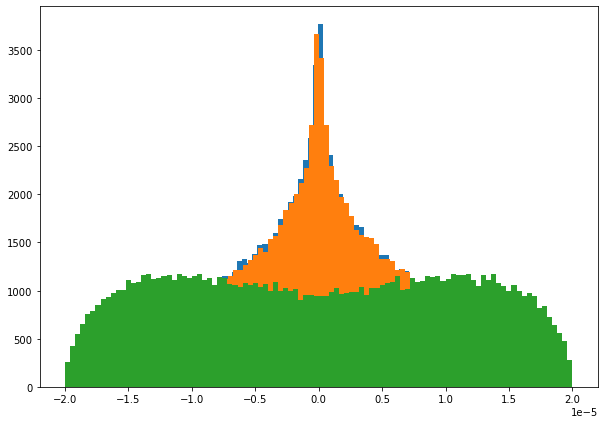

In [51]:
import matplotlib.pyplot as plt
num_ions = 100000
#rad = 2*10**-3 #ions uniformly distributed in sphere of this radius
rad = 2*10**-5 #test
vol = 4/3*np.pi*rad**3
start_pos_x = np.empty(num_ions)
start_pos_y = np.empty(num_ions)
start_pos_z = np.empty(num_ions)
theta = np.empty(num_ions)
for i in range(num_ions):
    this_vol = rand.random()*vol
    this_rad = (3/(4*np.pi)*this_vol)**(1/3)
    this_theta = rand.random()*np.pi
    this_phi = rand.random()*2*np.pi
    start_pos_x[i] = this_rad * np.sin(this_theta) * np.cos(this_phi)
    start_pos_y[i] = this_rad * np.sin(this_theta) * np.sin(this_phi)
    start_pos_z[i] = this_rad * np.cos(this_theta)
    theta[i] = this_theta
    
rx = start_pos_x
ry = start_pos_y
rz = start_pos_z
fig, ax = plt.subplots(figsize =(10, 7))
#x = np.linspace(0,2*10**-5,100)
#ax.plot(x, x**2*800*10**10)
ax.hist(rx,100)
ax.hist(ry,100)
ax.hist(rz,100)

#ax.hist(np.cos(theta),100)
 
# Show plot
plt.show()

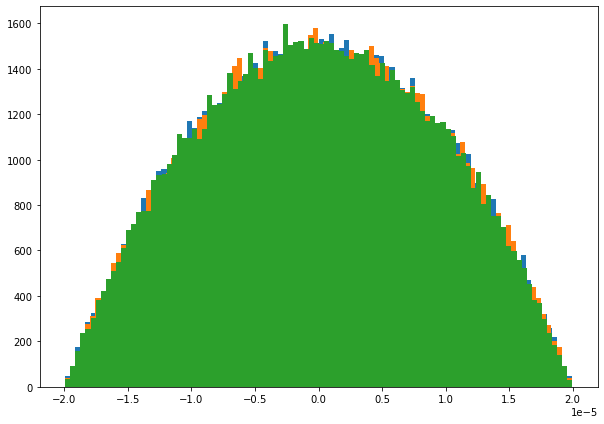

In [50]:
import matplotlib.pyplot as plt
num_ions = 100000
#rad = 2*10**-3 #ions uniformly distributed in sphere of this radius
rad = 2*10**-5 #test
vol = 4/3*np.pi*rad**3
start_pos_x = np.empty(num_ions)
start_pos_y = np.empty(num_ions)
start_pos_z = np.empty(num_ions)
theta = np.empty(num_ions)
for i in range(num_ions):
    this_vol = rand.random()*vol
    this_rad = (3/(4*np.pi)*this_vol)**(1/3)
    qq = rand.random()
    this_theta = np.arccos(2.*qq-1.)
    this_phi = rand.random()*2*np.pi
    start_pos_x[i] = this_rad * np.sin(this_theta) * np.cos(this_phi)
    start_pos_y[i] = this_rad * np.sin(this_theta) * np.sin(this_phi)
    start_pos_z[i] = this_rad * np.cos(this_theta)
    theta[i] = this_theta
    
rx = start_pos_x
ry = start_pos_y
rz = start_pos_z
fig, ax = plt.subplots(figsize =(10, 7))
#x = np.linspace(0,2*10**-5,100)
#ax.plot(x, x**2*700*10**10)
ax.hist(rx,100)
ax.hist(ry,100)
ax.hist(rz,100)
#ax.hist(np.cos(theta),100)
 
# Show plot
plt.show()